<a href="https://colab.research.google.com/github/Jahnavi-Sri-Kavya/Cloud-Computing-Project/blob/main/CC_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


# New Section

In [ ]:
from google.colab import auth
auth.authenticate_user()


In [ ]:
!gsutil cp gs://diabetic-dataset-bucket/diabetes.csv /content/

Copying gs://diabetic-dataset-bucket/diabetes.csv...
/ [1 files][  3.6 MiB/  3.6 MiB]                                                
Operation completed over 1 objects/3.6 MiB.                                      


In [4]:
file_path = '/content/diabetes.csv'
df = pd.read_csv(file_path)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


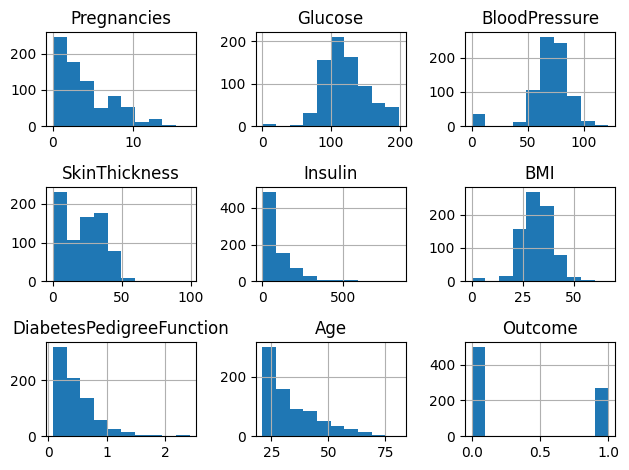

In [6]:
# show histogram
df.hist()
plt.tight_layout()
plt.show()

In [7]:
summary_stats = df.describe()
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.0000

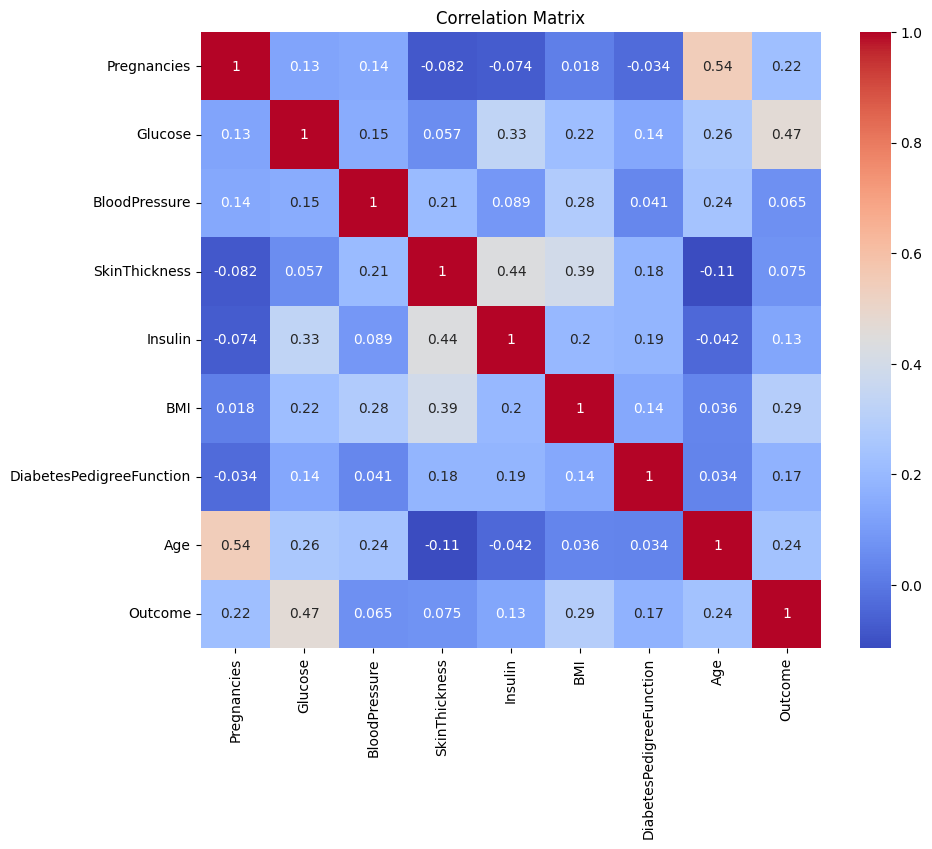

In [8]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

In [9]:
X = df.drop(columns=['Outcome'])
y = df['Outcome']

In [10]:
scaler = StandardScaler()
X[['Pregnancies',	'Glucose',	'BloodPressure',	'SkinThickness',	'Insulin',	'BMI',	'DiabetesPedigreeFunction',	'Age']] = scaler.fit_transform(X[['Pregnancies',	'Glucose',	'BloodPressure',	'SkinThickness',	'Insulin',	'BMI'	,'DiabetesPedigreeFunction',	'Age']])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
14/14 [==============================] - 1s 30ms/step - loss: 0.6766 - accuracy: 0.5828 - val_loss: 0.6472 - val_accuracy: 0.6389
Epoch 2/10
14/14 [==============================] - 0s 8ms/step - loss: 0.5865 - accuracy: 0.7110 - val_loss: 0.5845 - val_accuracy: 0.7130
Epoch 3/10
14/14 [==============================] - 0s 7ms/step - loss: 0.5278 - accuracy: 0.7552 - val_loss: 0.5402 - val_accuracy: 0.7407
Epoch 4/10
14/14 [==============================] - 0s 6ms/step - loss: 0.4928 - accuracy: 0.7739 - val_loss: 0.5123 - val_accuracy: 0.7315
Epoch 5/10
14/14 [==============================] - 0s 8ms/step - loss: 0.4679 - accuracy: 0.7762 - val_loss: 0.4917 - val_accuracy: 0.7407
Epoch 6/10
14/14 [==============================] - 0s 7ms/step - loss: 0.4539 - accuracy: 0.7809 - val_loss: 0.4805 - val_accuracy: 0.7315
Epoch 7/10
14/14 [==============================] - 0s 8ms/step - loss: 0.4418 - accuracy: 0.7879 - val_loss: 0.4731 - val_accuracy: 0.7407
Epoch 8/10
14/14 [=

In [ ]:
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print(f"Training Loss: {train_loss}")
print(f"Training Accuracy: {train_accuracy}")

2188/2188 [==============================] - 9s 4ms/step - loss: 0.0814 - accuracy: 0.9723
Training Loss: 0.08141043782234192
Training Accuracy: 0.9722714424133301


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

938/938 [==============================] - 5s 6ms/step - loss: 0.0828 - accuracy: 0.9712
Test Loss: 0.08284401148557663
Test Accuracy: 0.9711999893188477


In [ ]:
# Save the TensorFlow model
model.save('my_model')

In [ ]:
!gsutil -m cp -r my_model gs://diabetic-dataset-bucket/models/


Copying file://my_model/fingerprint.pb [Content-Type=application/octet-stream]...
Copying file://my_model/saved_model.pb [Content-Type=application/octet-stream]...
Copying file://my_model/variables/variables.index [Content-Type=application/octet-stream]...
Copying file://my_model/keras_metadata.pb [Content-Type=application/octet-stream]...
Copying file://my_model/variables/variables.data-00000-of-00001 [Content-Type=application/octet-stream]...
\ [5/5 files][150.0 KiB/150.0 KiB] 100% Done                                    
Operation completed over 5 objects/150.0 KiB.                                    
